## Crime Data and Visualization:
## In an effort to improve my data visualization techniques I experimented with organizing and visualizng the data provided from NYPD Crime Complaints.

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# I got data from the link below, which is a database of NYPD crime complaints.

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:

estimated size of the download (based on metadata information from the site) = 2.0gigabytes     
# The website listed the total rows at 6 million and 35 columns. Which each row being 4 bytes worth of information 
#I assumed that 2 gigibabytes, which is 2 billion bytes would be enough.


SyntaxError: invalid syntax (<ipython-input-3-b562da6a0301>, line 2)

### Here I do a simple download of the data.

In [3]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Wed Sep 25 18:11:49 2019
MD5 hash of file: 5f6acf3113970cc1506d63ab6a20daa1
Located at data\NYPD_Complaint_Data_Historic.csv


### List the size of the file.

In [6]:

import os

size_info = os.stat('NYPD_Complaint_Data_Historic.csv')

size_info.st_size



2052178815

### The data file is too big so I split it up into 10 different files in order to work on it easier.

In [7]:
# Using utils library, find the number of lines in the file

num_lines = sum(1 for line in open('NYPD_Complaint_Data_Historic.csv'))

print(num_lines)


6500871


In [10]:


##Lines = 6500871
#Lines_per_File= 650087

#file_num= 1

#for row in pd.read_csv(file_name, chunksize = Lines_per_File):
   ## row.to_csv('NYPD_Complaint_Data_Historic_' + str(file_num) + '.csv', index= False)
    #file_num+=1
    
csvPath = "data/NYPD_Complaint_Data_Historic.csv"
#Divide rows of big files into smaller amounts
totalRows = utils.line_count(csvPath)
fileRows = 650087
#print(fileRows)
csvFile = open(csvPath, 'r').readlines()
fileNum = 1

#Run ten times
for i in range(totalRows):
    if i % fileRows == 0:
        open(str(csvPath) +"_" + str(fileNum), 'w+').writelines(csvFile[i:i+fileRows])
        fileNum += 1   


### Use GLOB to create a path through the files

In [11]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['namesbystate.zip',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic.csv_1',
 'NYPD_Complaint_Data_Historic.csv_10',
 'NYPD_Complaint_Data_Historic.csv_11',
 'NYPD_Complaint_Data_Historic.csv_2',
 'NYPD_Complaint_Data_Historic.csv_3',
 'NYPD_Complaint_Data_Historic.csv_4',
 'NYPD_Complaint_Data_Historic.csv_5',
 'NYPD_Complaint_Data_Historic.csv_6',
 'NYPD_Complaint_Data_Historic.csv_7',
 'NYPD_Complaint_Data_Historic.csv_8',
 'NYPD_Complaint_Data_Historic.csv_9']

### Since the file is still to large I'll first look at it without making it into a dataframe

In [29]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')


['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '577055921,12/31/2018,19:00:00,12/31/2018,19:35:00,75,12/31/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,,EAST NEW YORK CITY LINE,348,1019655,182468,<18,BLACK,F,,40.66744666500005,-73.87237725799997,"(40.667446665, -73.872377258)",PATROL BORO BKLYN NORTH,,18-24,BLACK,M\n',
 '311304275,12/31/2018,15:00:00,12/31/2018,16:00:00,41,12/31/2018,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,N.Y. POLICE DEPT,0,,,,1015845,236500,25-44,WHITE HISPANIC,

### All 35 columns: 

* CMPLNT_NUM: Number of the complaint
* CMPLNT_FR_DT: Date the complaint occured
* CMPLNT_FR_TM: Time the complaint occured
* CMPLNT_TO_DT: Date the complaint was recieved 
* CMPLNT_TO_TM: Time the complaint was recieved
* ADDR_PCT_CD: Address complaint occured
* RPT_DT:
* KY_CD
* OFNS_DESC
* PD_CD
* PD_DESC
* CRM_ATPT_CPTD_CD
* LAW_CAT_CD
* BORO_NM: Name of Boro
* LOC_OF_OCCUR_DESC: Description of location that the complaint occured at
* PREM_TYP_DESC
* JURIS_DESC
* JURISDICTION_CODE
* PARKS_NM
* HADEVELOPT
* HOUSING_PSA
* X_COORD_CD
* Y_COORD_CD
* SUSP_AGE_GROUP
* SUSP_RACE
* SUSP_SEX
* TRANSIT_DISTRICT
* Latitude
* Longitude
* Lat_Lon
* PATROL_BORO
* STATION_NAME
* VIC_AGE_GROUP:Age group of the victim
* VIC_RACE:Race of the victim
* VIC_SEX:Sex of the victim


# Exploratory Data Analysis on the first created file:


In [4]:
### BEGIN SOLUTION
import pandas as pd
import time 
start_time = time.time()

calls = pd.read_csv("data/NYPD_Complaint_Data_Historic.csv_1")
calls.head()
print("--- %s seconds ---" % (time.time() - start_time))
#t = time.it.timer
### END SOLUTION

--- 10.572914361953735 seconds ---


### List of the fields within the file

In [13]:

calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
#PARKS_NM, HADEVELOPT,TRANSIT_DISTRICT, STATION_NAME



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650086 entries, 0 to 650085
Data columns (total 35 columns):
CMPLNT_NUM           650086 non-null int64
CMPLNT_FR_DT         650086 non-null object
CMPLNT_FR_TM         650086 non-null object
CMPLNT_TO_DT         556899 non-null object
CMPLNT_TO_TM         557243 non-null object
ADDR_PCT_CD          650083 non-null float64
RPT_DT               650086 non-null object
KY_CD                650086 non-null int64
OFNS_DESC            650078 non-null object
PD_CD                649685 non-null float64
PD_DESC              649685 non-null object
CRM_ATPT_CPTD_CD     650086 non-null object
LAW_CAT_CD           650086 non-null object
BORO_NM              649680 non-null object
LOC_OF_OCCUR_DESC    528543 non-null object
PREM_TYP_DESC        647403 non-null object
JURIS_DESC           650086 non-null object
JURISDICTION_CODE    649685 non-null float64
PARKS_NM             5807 non-null object
HADEVELOPT           31664 non-null object
HOUSING_PSA

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.500860e+05,650083.000000,650086.000000,649685.000000,649685.000000,6.500370e+05,650037.000000,16683.000000,650037.000000,650037.000000
mean,5.502522e+08,62.685948,305.124376,405.605441,0.986586,1.004769e+06,207494.260254,13.116766,40.736159,-73.925932
std,2.596700e+08,34.559920,154.470929,218.273654,8.449202,2.127196e+04,30311.301457,12.376484,0.083201,0.076716
min,1.000001e+08,1.000000,101.000000,101.000000,0.000000,9.135120e+05,121174.000000,1.000000,40.499025,-74.254377
25%,3.252961e+08,40.000000,118.000000,254.000000,0.000000,9.915040e+05,184724.000000,3.000000,40.673622,-73.973832
50%,5.503958e+08,62.000000,341.000000,343.000000,0.000000,1.004220e+06,206764.000000,4.000000,40.734119,-73.927968
75%,7.752070e+08,90.000000,351.000000,638.000000,0.000000,1.016453e+06,235173.000000,30.000000,40.812153,-73.883722
max,9.999956e+08,123.000000,678.000000,922.000000,97.000000,1.067226e+06,271820.000000,34.000000,40.912723,-73.700568


### Let's find uniques and ask neccesary questions: 

In [14]:

calls.nunique()

# Questions


# How many age groups are represented in the data set?
#54
#How many boroughs are included in the data set?
#5
# How many offense types are listed in this data set?
#61


CMPLNT_NUM           650041
CMPLNT_FR_DT            518
CMPLNT_FR_TM           1440
CMPLNT_TO_DT            522
CMPLNT_TO_TM           1440
ADDR_PCT_CD              77
RPT_DT                  518
KY_CD                    66
OFNS_DESC                61
PD_CD                   360
PD_DESC                 350
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            72
JURIS_DESC               19
JURISDICTION_CODE        19
PARKS_NM                741
HADEVELOPT              264
HOUSING_PSA             477
X_COORD_CD            52198
Y_COORD_CD            55454
SUSP_AGE_GROUP           40
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             119316
Longitude            117219
Lat_Lon               76913
PATROL_BORO               8
STATION_NAME            367
VIC_AGE_GROUP            54
VIC_RACE                  7
VIC_SEX                   5
dtype: int64

### Create a data frame that groups offenses by BORO


In [301]:


#calls_by_Boro_and_offense = calls.groupby('BORO_NM')['OFNS_DESC']
#calls_by_Boro_and_offense = calls.groupby('BORO_NM')['OFNS_DESC'].count()
#calls_by_Boro_and_offense = calls.groupby(['BORO_NM','OFNS_DESC'])['OFNS_DESC'].count()
calls_by_Boro_and_offense = calls.set_index(['BORO_NM','OFNS_DESC']).groupby(level=[0,1]).size()
print(calls_by_Boro_and_offense) 
#print calls_by_Boro_and_offense.get_group(BORO_NM)



BORO_NM        OFNS_DESC                           
BRONX          ABORTION                                    1
               ADMINISTRATIVE CODE                       388
               AGRICULTURE & MRKTS LAW-UNCLASSIFIED       59
               ALCOHOLIC BEVERAGE CONTROL LAW             56
               ANTICIPATORY OFFENSES                       1
               ARSON                                     293
               ASSAULT 3 & RELATED OFFENSES            19842
               BURGLAR'S TOOLS                            48
               BURGLARY                                 3242
               CHILD ABANDONMENT/NON SUPPORT              10
               CRIMINAL MISCHIEF & RELATED OF          14724
               CRIMINAL TRESPASS                         760
               DANGEROUS DRUGS                          8319
               DANGEROUS WEAPONS                        3099
               DISORDERLY CONDUCT                          8
               ENDAN WELFARE INCO

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [12]:
### BEGIN SOLUTION

 
  
    

    
calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].unique()

#calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].unique().size

### END SOLUTION

# How many offenses were committed in Bronx during the analysis period?

array(['ASSAULT 3 & RELATED OFFENSES', 'HARRASSMENT 2', 'ROBBERY',
       'GRAND LARCENY', 'PETIT LARCENY', 'FELONY ASSAULT',
       'DANGEROUS WEAPONS', 'DANGEROUS DRUGS',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFF. AGNST PUB ORD SENSBLTY &',
       'SEX CRIMES', 'RAPE', 'OFFENSES AGAINST PUBLIC ADMINI',
       'CRIMINAL TRESPASS', 'VEHICLE AND TRAFFIC LAWS',
       'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW',
       "BURGLAR'S TOOLS", 'FRAUDS', 'BURGLARY',
       'INTOXICATED/IMPAIRED DRIVING', 'GRAND LARCENY OF MOTOR VEHICLE',
       'ADMINISTRATIVE CODE', 'KIDNAPPING & RELATED OFFENSES',
       'OFFENSES AGAINST THE PERSON', 'NYS LAWS-UNCLASSIFIED FELONY',
       'UNAUTHORIZED USE OF A VEHICLE', 'JOSTLING', 'FORGERY',
       'POSSESSION OF STOLEN PROPERTY', 'OFFENSES INVOLVING FRAUD',
       'ARSON', 'OTHER STATE LAWS (NON PENAL LA',
       'OTHER OFFENSES RELATED TO THEF',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'THEFT-FRAUD',
       'FRAUDULENT ACCOSTING

### What are the most common types of crimes in the Bronx?



In [16]:

calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].value_counts().head(5).keys()


Index(['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY'],
      dtype='object')

### What is the probability of arson in the bronx?

In [17]:
### BEGIN SOLUTION
ArsonTotal = calls.loc[(calls["BORO_NM"]) == "BRONX", "OFNS_DESC"].count()
#bronxTotal
BronxA = calls.loc[(calls["BORO_NM"] == "BRONX") & (calls["OFNS_DESC"] == "ARSON"), "OFNS_DESC"].count()
#bronxArson
print( str(BronxA / ArsonTotal) + " probability of arson")
#Ask to convert to precent or not
### END SOLUTION

0.002061115957117533 probability of arson


---
# Exercises in visualizing the collected data


## A regular bar h plot

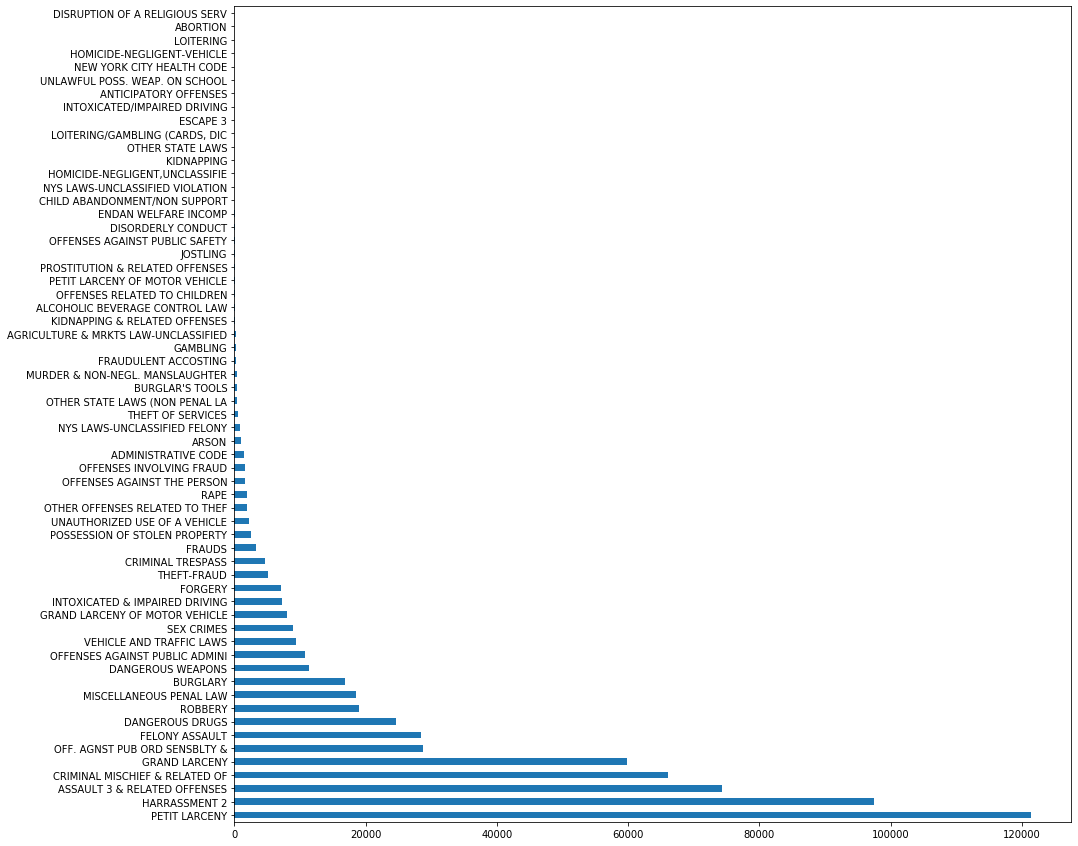

In [26]:


#mess around with figsize
df = calls["OFNS_DESC"].value_counts()
set_plot = df.plot.barh(figsize=(15,15))


### The above plot was too messy, make a plot with all crimes with over 1000 calls

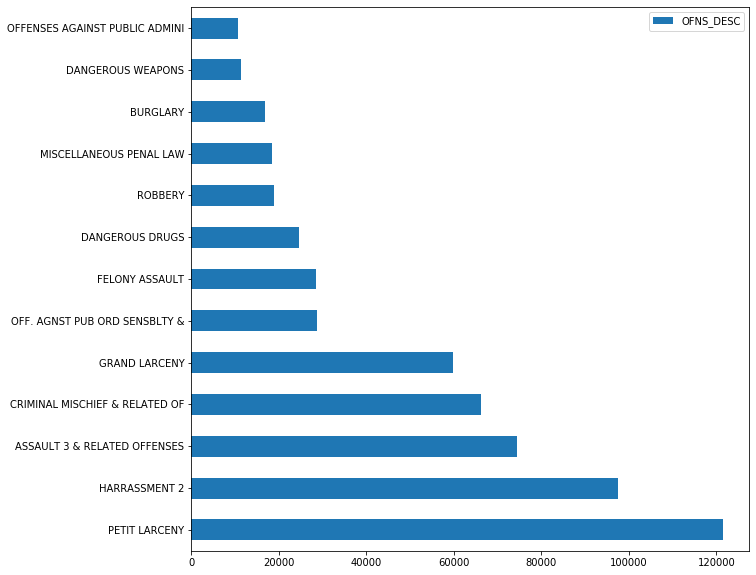

In [33]:


throwaway = 10000
over_k = calls.loc[:, "OFNS_DESC"].value_counts()
##timer
df = over_k[over_k > throwaway].plot.barh(figsize=(10,10))
df.legend()


## Now try it with the SNS call

Text(0, 0.5, 'Crime Category')

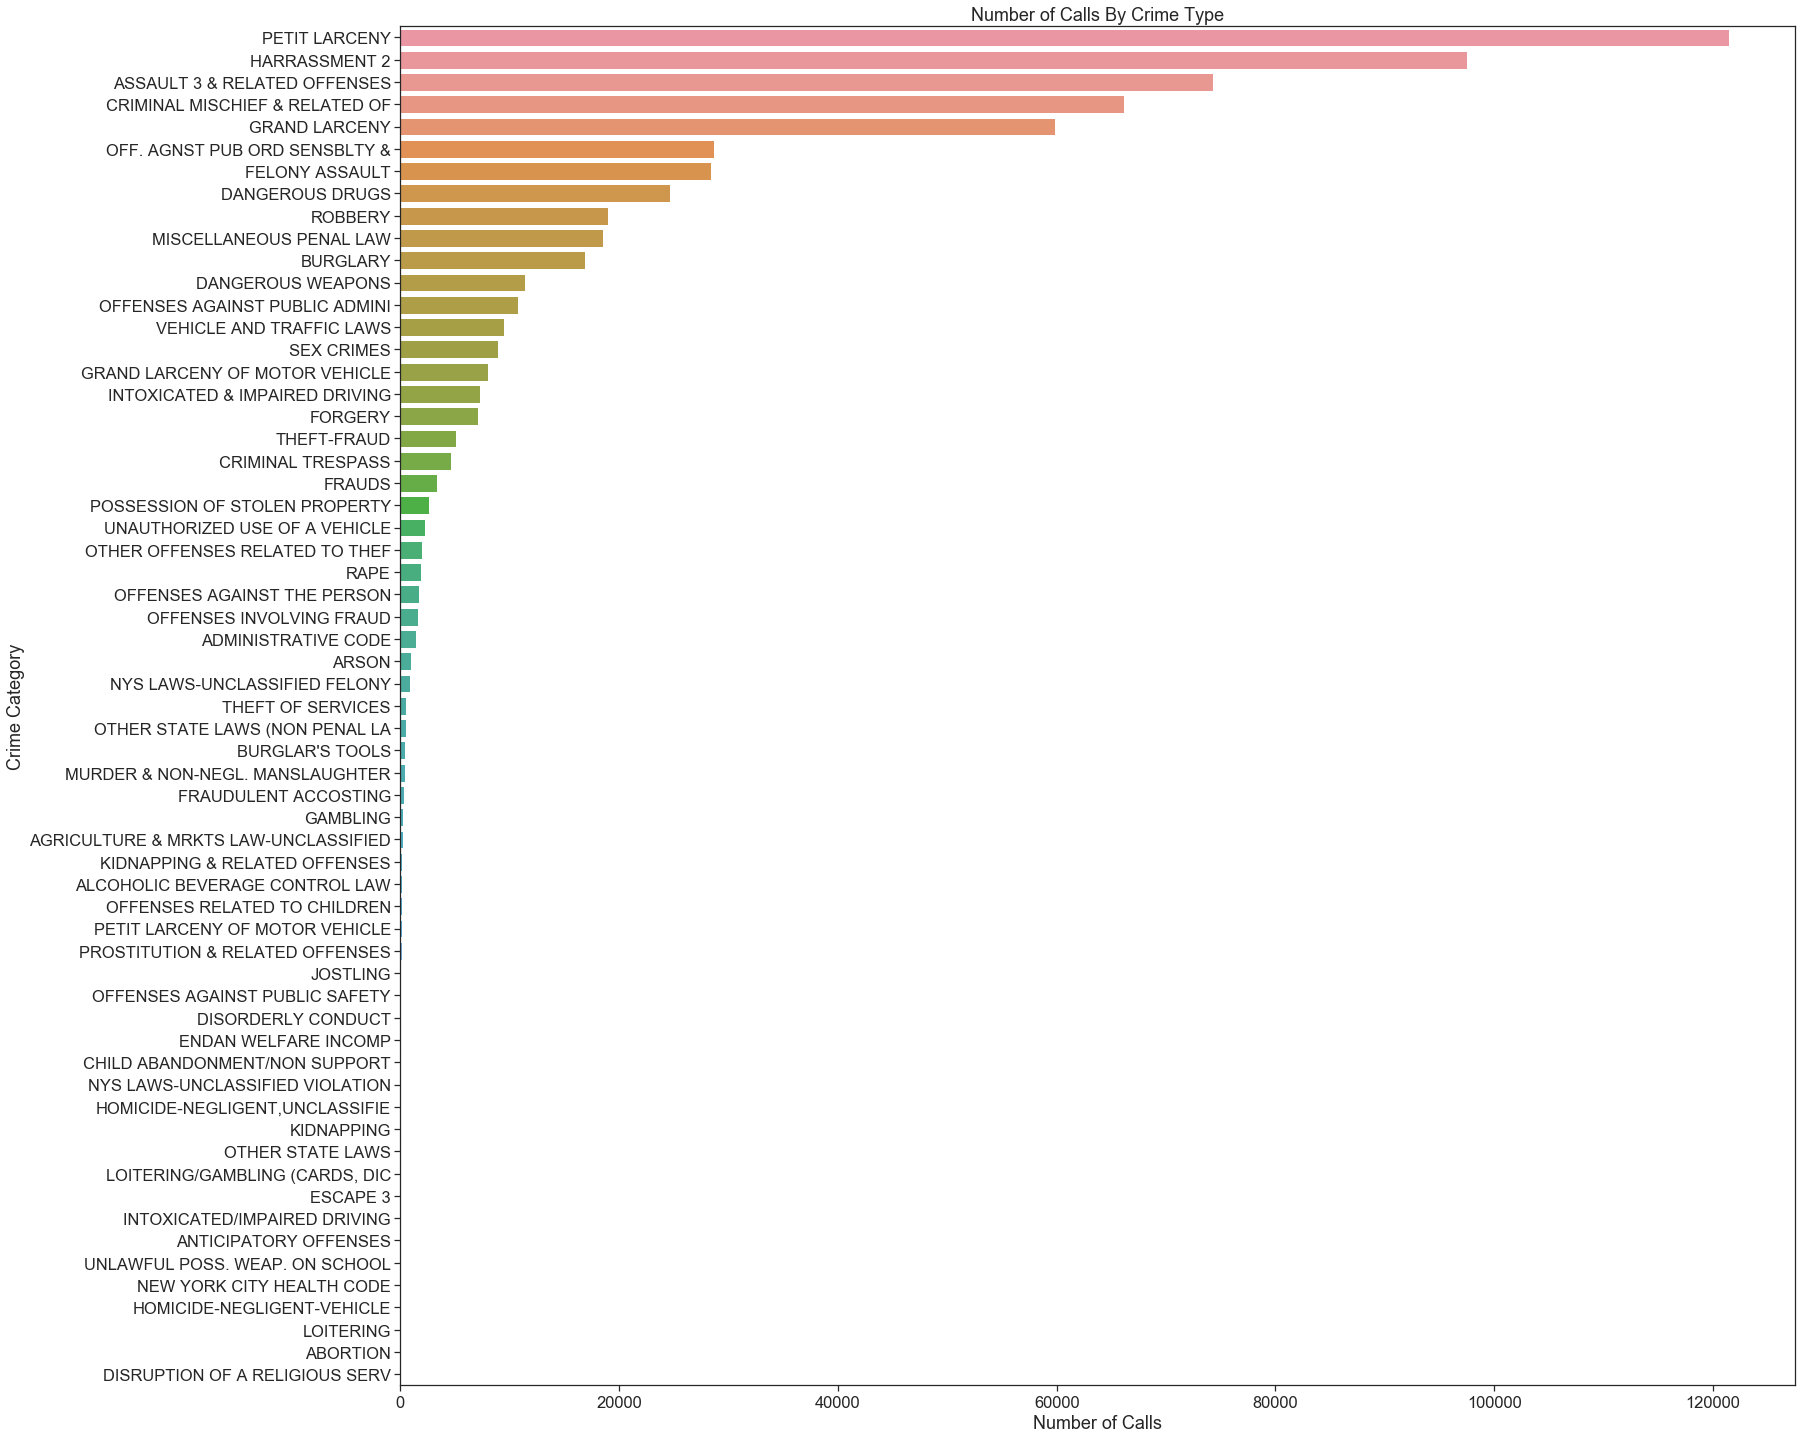

In [80]:


sns.set(font_scale=1.5, style = "ticks") 
plt.figure(figsize=(25, 25))
throwaway = 10000
df = sns.countplot( y=calls["OFNS_DESC"], data=ofences[ofences > throwaway],
                   order = calls['OFNS_DESC'].value_counts().index).set_title('Number of Calls By Crime Type')

plt.xlabel('Number of Calls', axes=ax)
plt.ylabel('Crime Category', axes=ax)


## Experimenting with a different ordering system

Text(0, 0.5, 'OFNS_DESC')

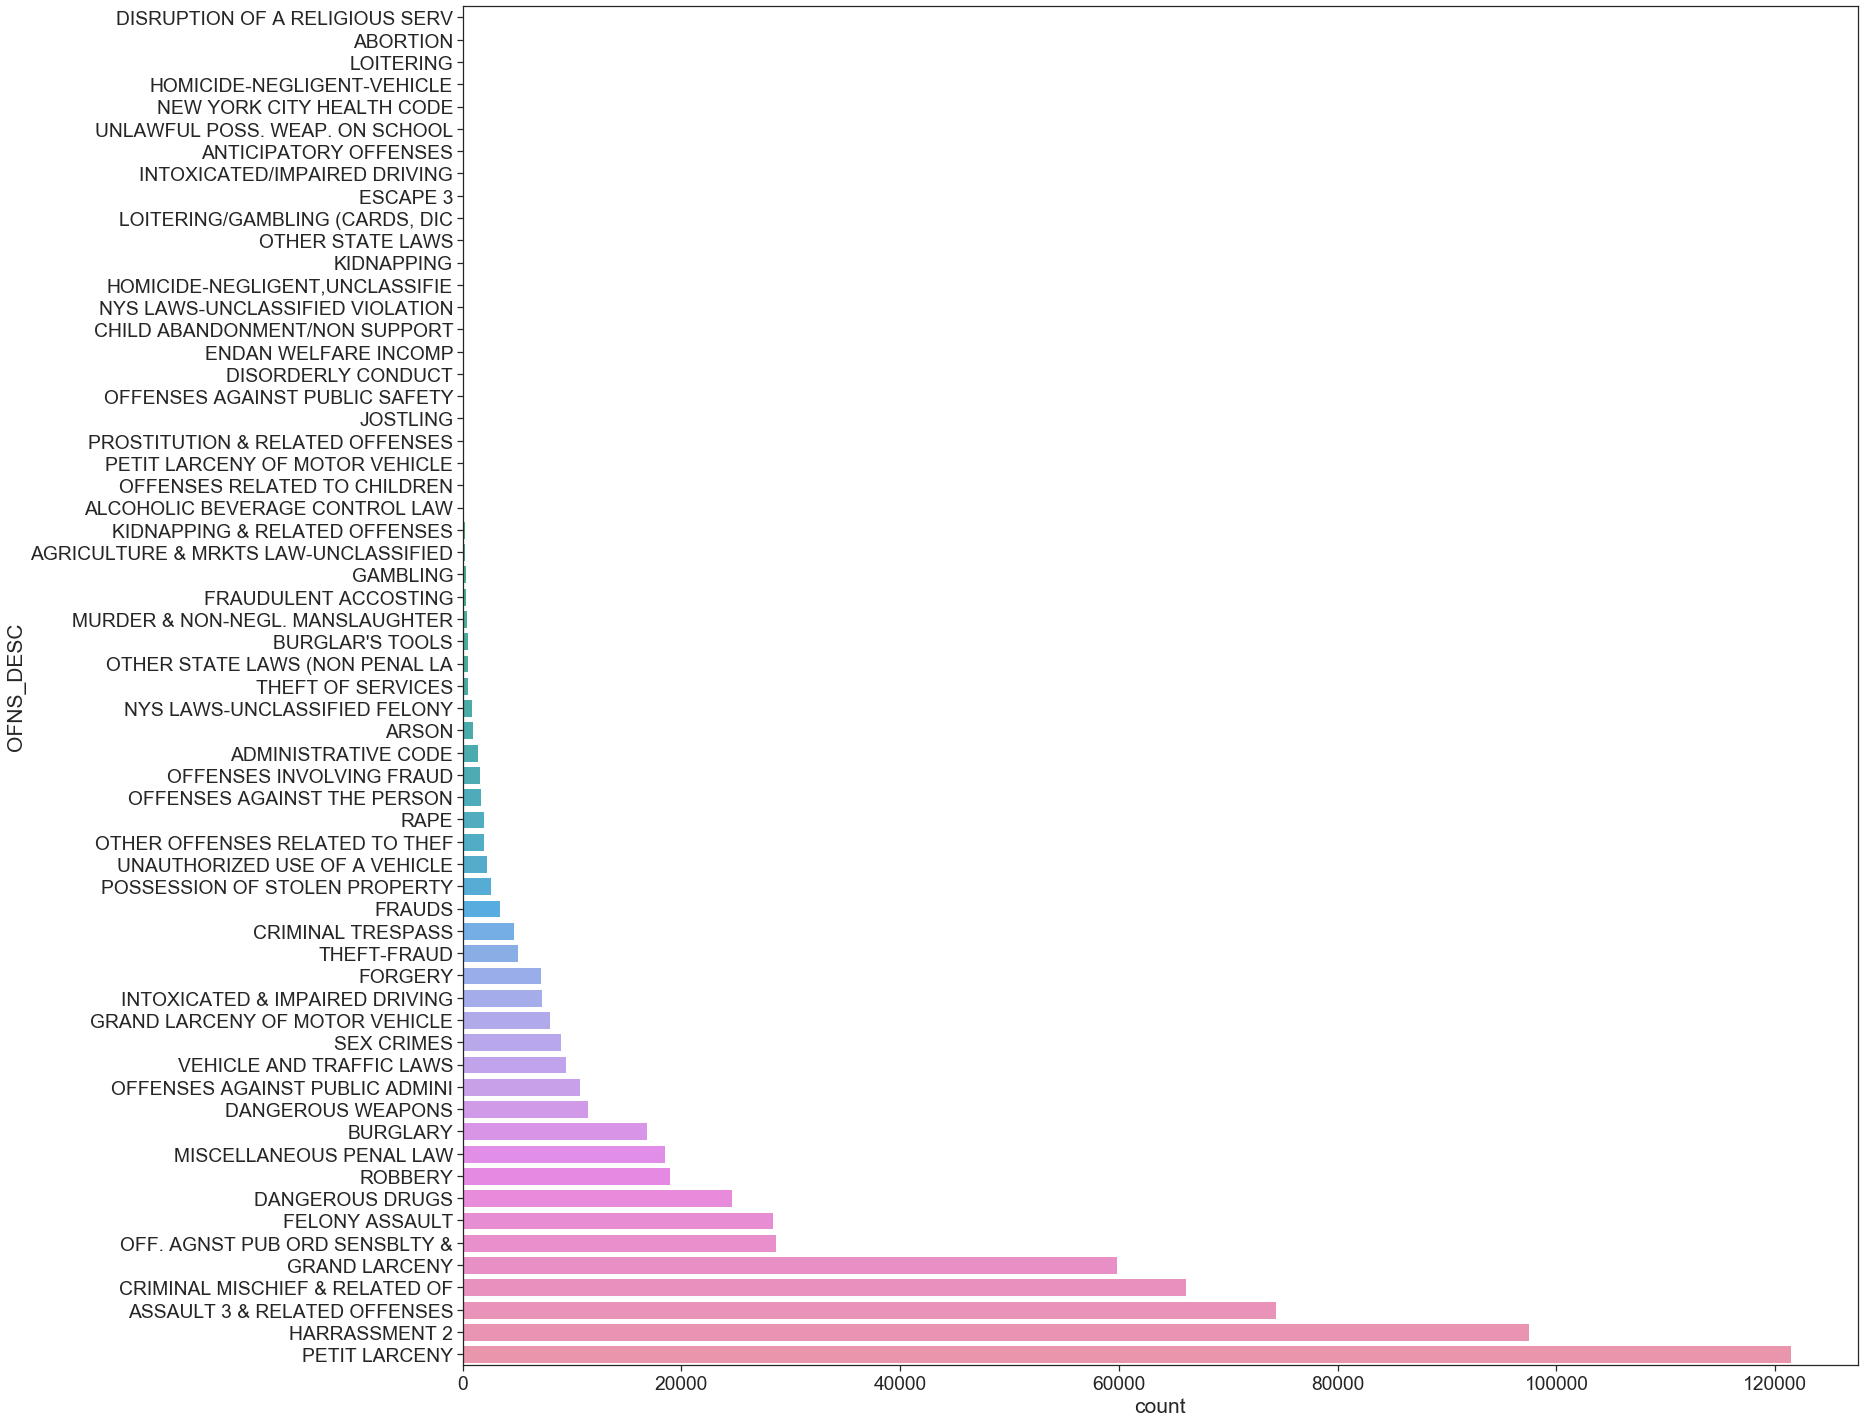

In [94]:
### BEGIN SOLUTION
throwaway = 10000
sns.set(font_scale=1.75, style = "ticks") 
plt.figure(figsize=(25, 25))
df = sns.countplot(y=calls["OFNS_DESC"], 
                   data=ofences[ofences > throwaway], 
                   order=calls["OFNS_DESC"].value_counts(ascending=True).index)
plt.xlabel('count', axes=ax)
plt.ylabel('OFNS_DESC', axes=ax)

### END SOLUTION

### Time to create new plots based off of the day that the crim occured

In [104]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

#dayConversion = pd.to_datetime(calls['CMPLNT_FR_DT']).dt.day_name(days)
#calls['DAY_OF_WEEK'] = dayConversion
#calls['DAY_OF_WEEK']

calls['CMPLNT_FR_DT'] = pd.to_datetime(calls['CMPLNT_FR_DT'])
calls['DAY_OF_WEEK'] = calls['CMPLNT_FR_DT'].dt.weekday_name
calls['DAY_OF_WEEK'] 


0          Monday
1          Monday
2          Monday
3          Monday
4          Monday
5          Monday
6          Monday
7          Monday
8          Monday
9          Monday
10         Monday
11         Monday
12         Monday
13         Monday
14         Monday
15         Monday
16         Monday
17         Monday
18         Monday
19         Monday
20         Monday
21         Monday
22         Monday
23         Monday
24         Monday
25         Monday
26         Monday
27         Monday
28         Monday
29         Monday
           ...   
650056    Tuesday
650057    Tuesday
650058    Tuesday
650059    Tuesday
650060    Tuesday
650061    Tuesday
650062    Tuesday
650063    Tuesday
650064    Tuesday
650065    Tuesday
650066    Tuesday
650067    Tuesday
650068    Tuesday
650069    Tuesday
650070    Tuesday
650071    Tuesday
650072    Tuesday
650073    Tuesday
650074    Tuesday
650075    Tuesday
650076    Tuesday
650077    Tuesday
650078    Tuesday
650079    Tuesday
650080    

### Seaborn plot to show the number of calls for each day of the week.



Text(0, 0.5, 'Count')

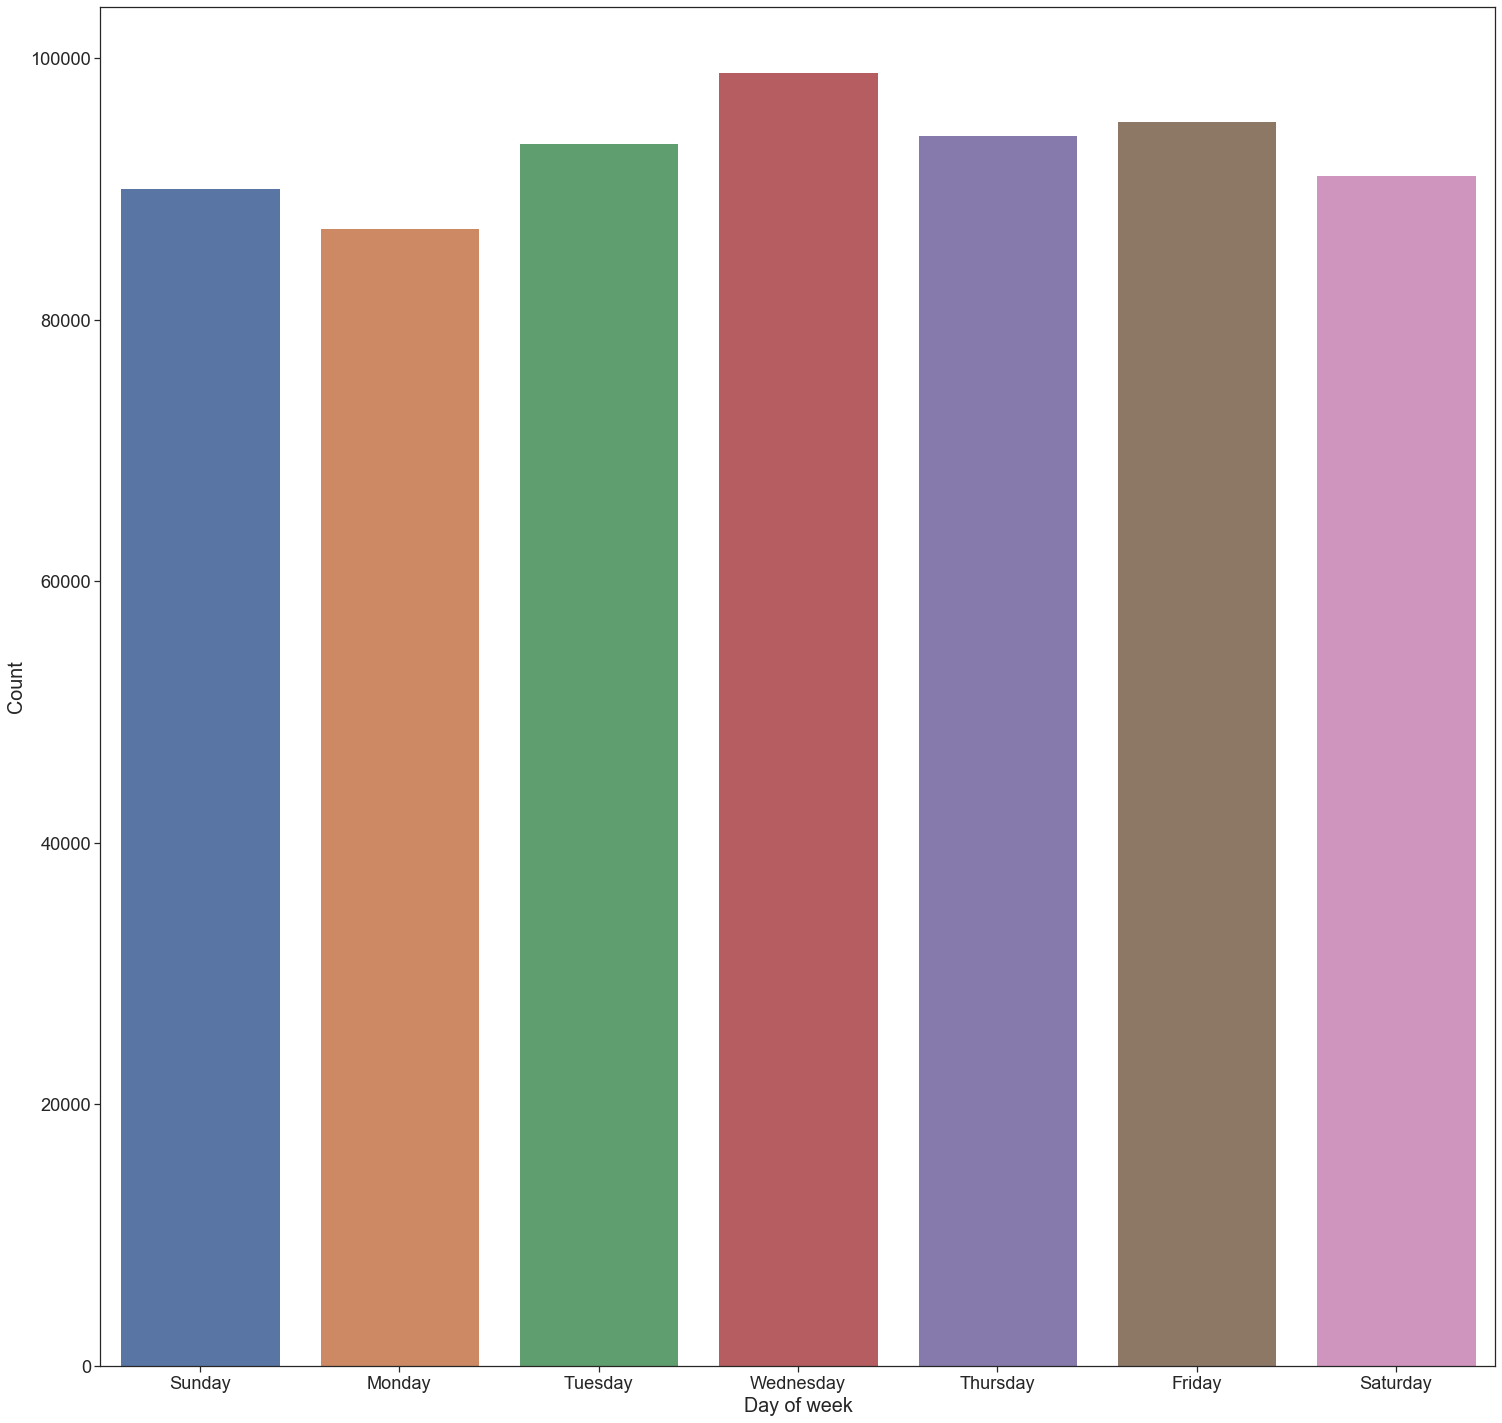

In [142]:


sns.set(font_scale=1.65, style = "ticks") 
plt.figure(figsize=(25, 25))
df = sns.countplot(x=calls['DAY_OF_WEEK'])

df.set_xticklabels(days, rotation=0)
plt.xlabel('Day of week', axes=ax)
plt.ylabel('Count', axes=ax)


## Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week ordered by day of the week.

Text(0, 0.5, 'Count')

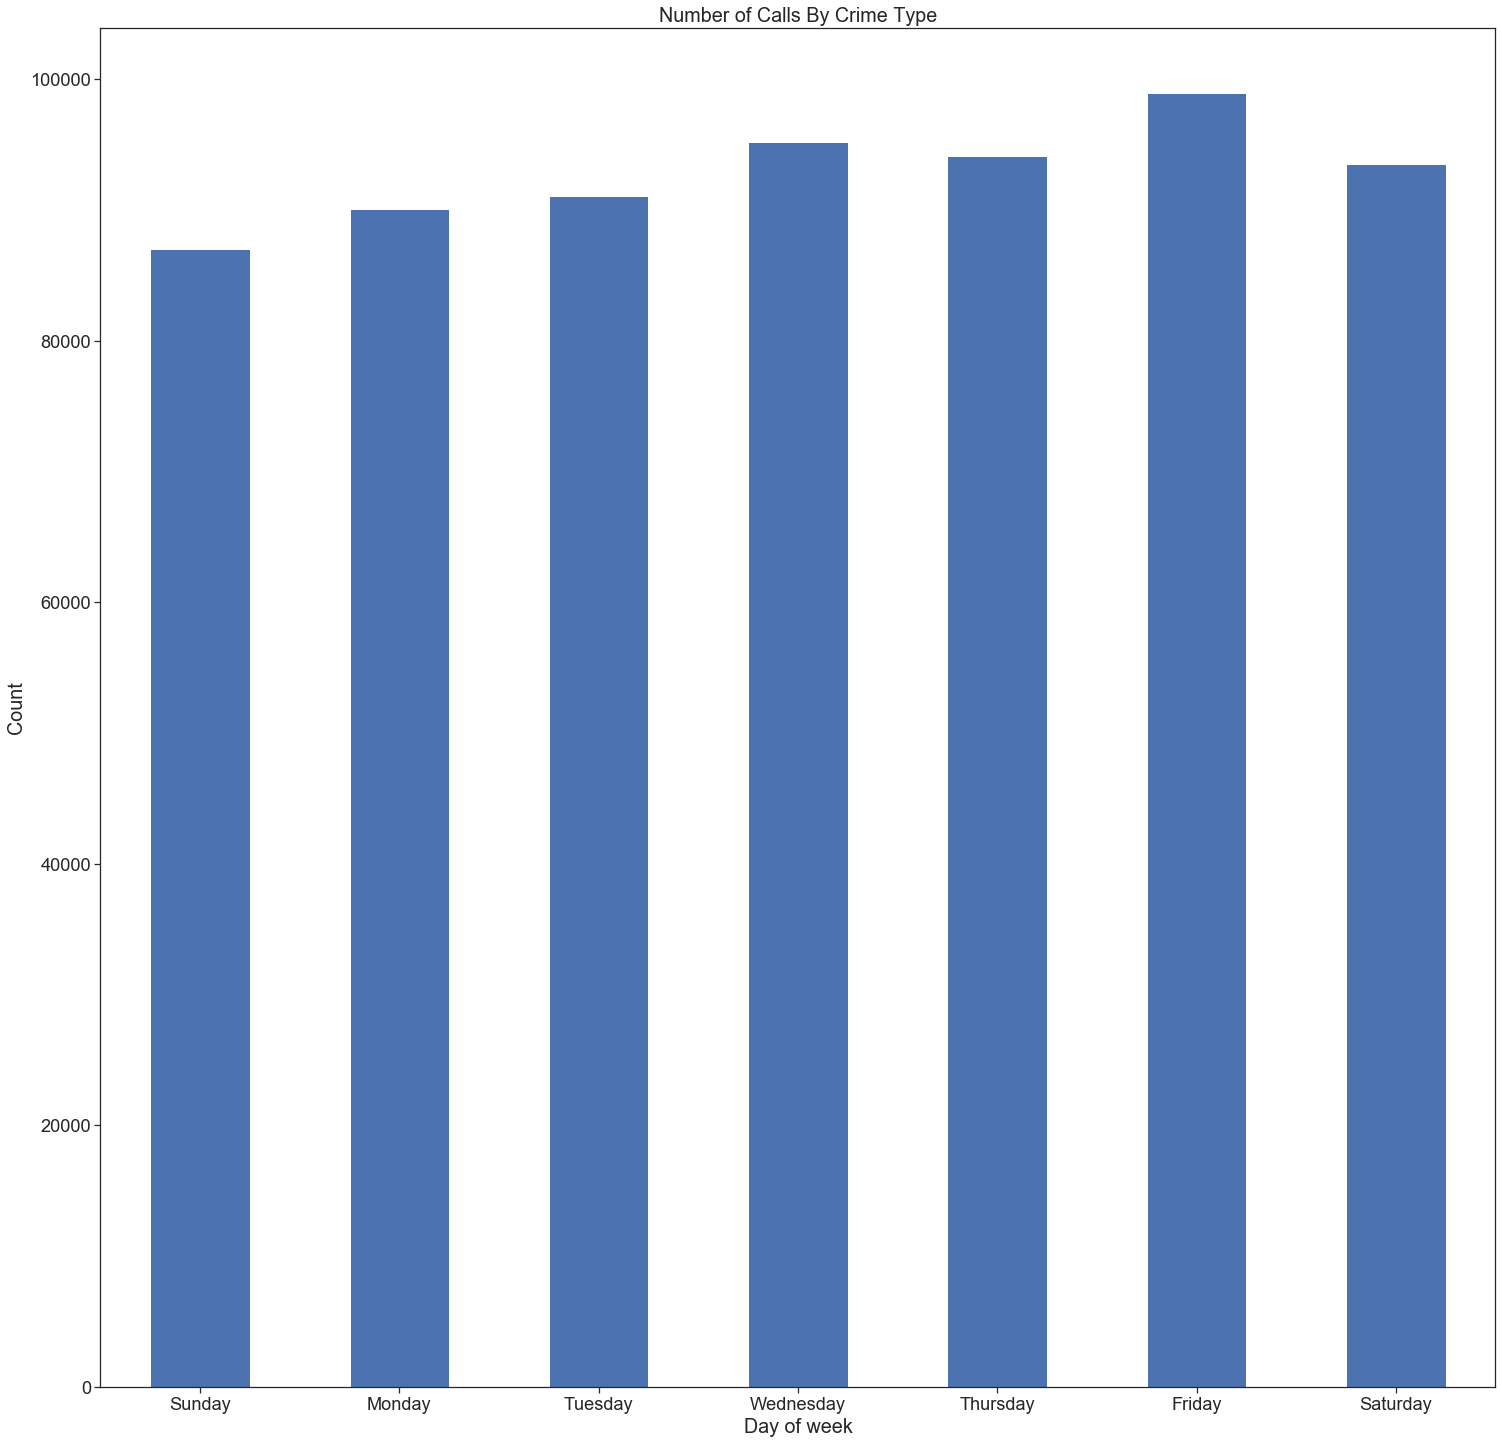

In [147]:

throws = calls['DAY_OF_WEEK']
plt.figure(figsize=(25, 25))

df = throws.value_counts().reindex(days)

df.plot("bar").set_title('Number of Calls By Crime Type')

plt.xticks(rotation=0)
plt.xlabel('Day of week', axes = ax)
plt.ylabel('Count', axes=ax)


## What days of the week have more calls:

From the breakdown I see that there is a general slight increase of more calls during the week when compared to saturday or sunday. Although it doesn't seem to be a large enough difference to make any solid conclusions on it.


## We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?


Text(0, 0.5, 'Count')

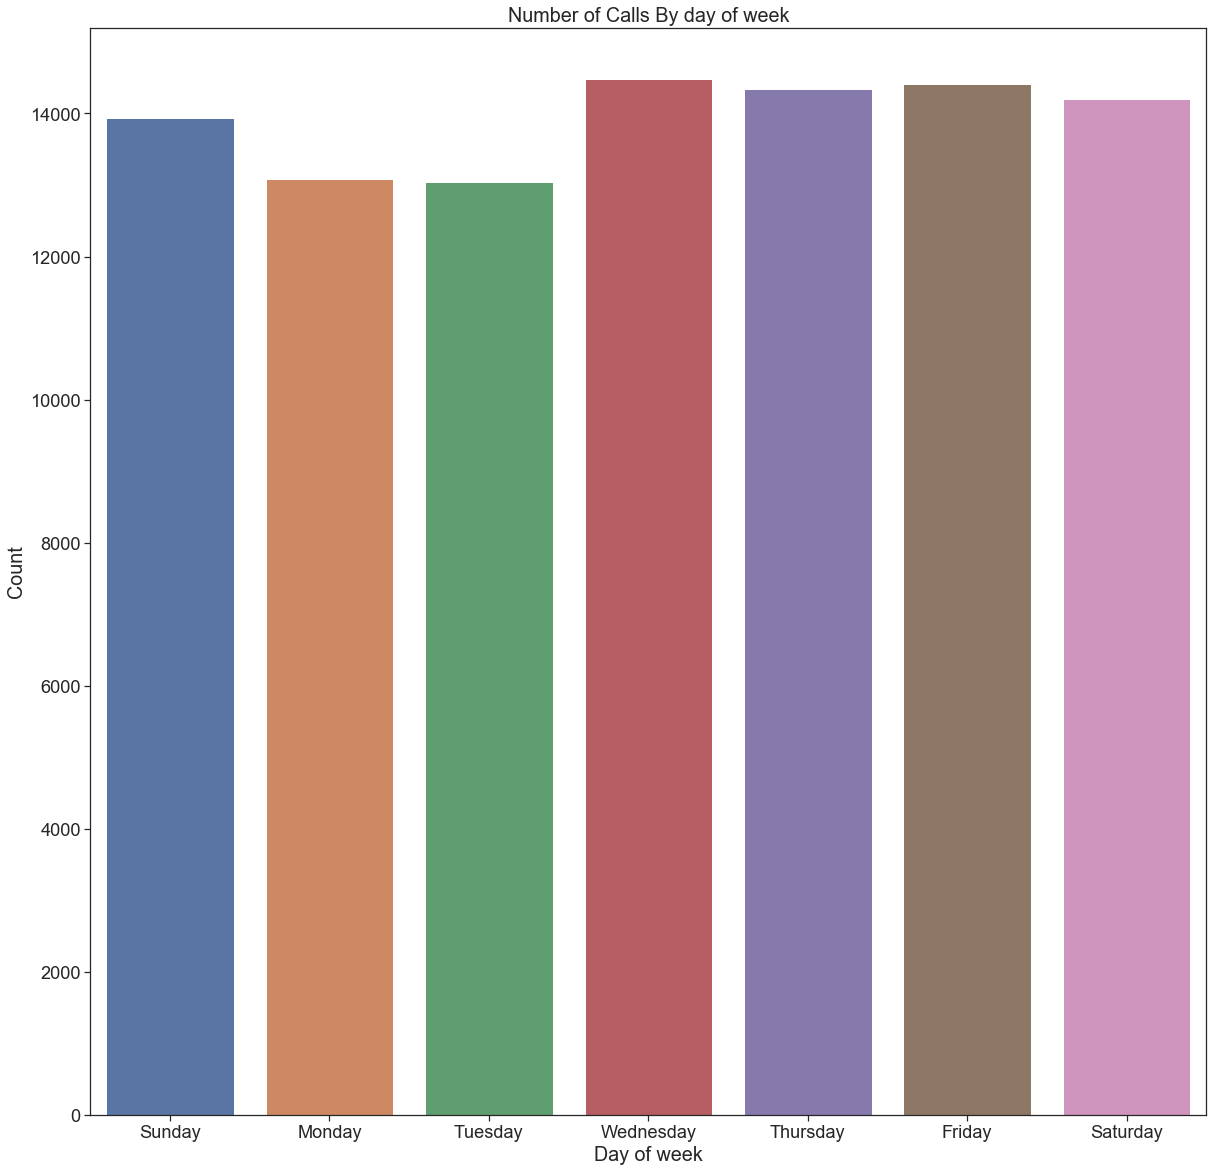

In [169]:

plt.figure(figsize=(20, 20))
o = "OFNS_DESC"
h = "HARRASSMENT 2"
d = 'DAY_OF_WEEK'

sets = calls[(calls[o] == h)]


df=sns.countplot(x=sets[d])

df.set_title('Number of Calls By day of week')
df.set_xticklabels(days, rotation=0)
plt.xlabel('Day of week', axes=ax)
plt.ylabel('Count', axes=ax)





## On Friday-Sunday Harrassment generally has a slightly higher report occurance when compared to the other days of the week, except for Wednesday which has the highest.


### Plots for burglary



Text(0, 0.5, 'Count')

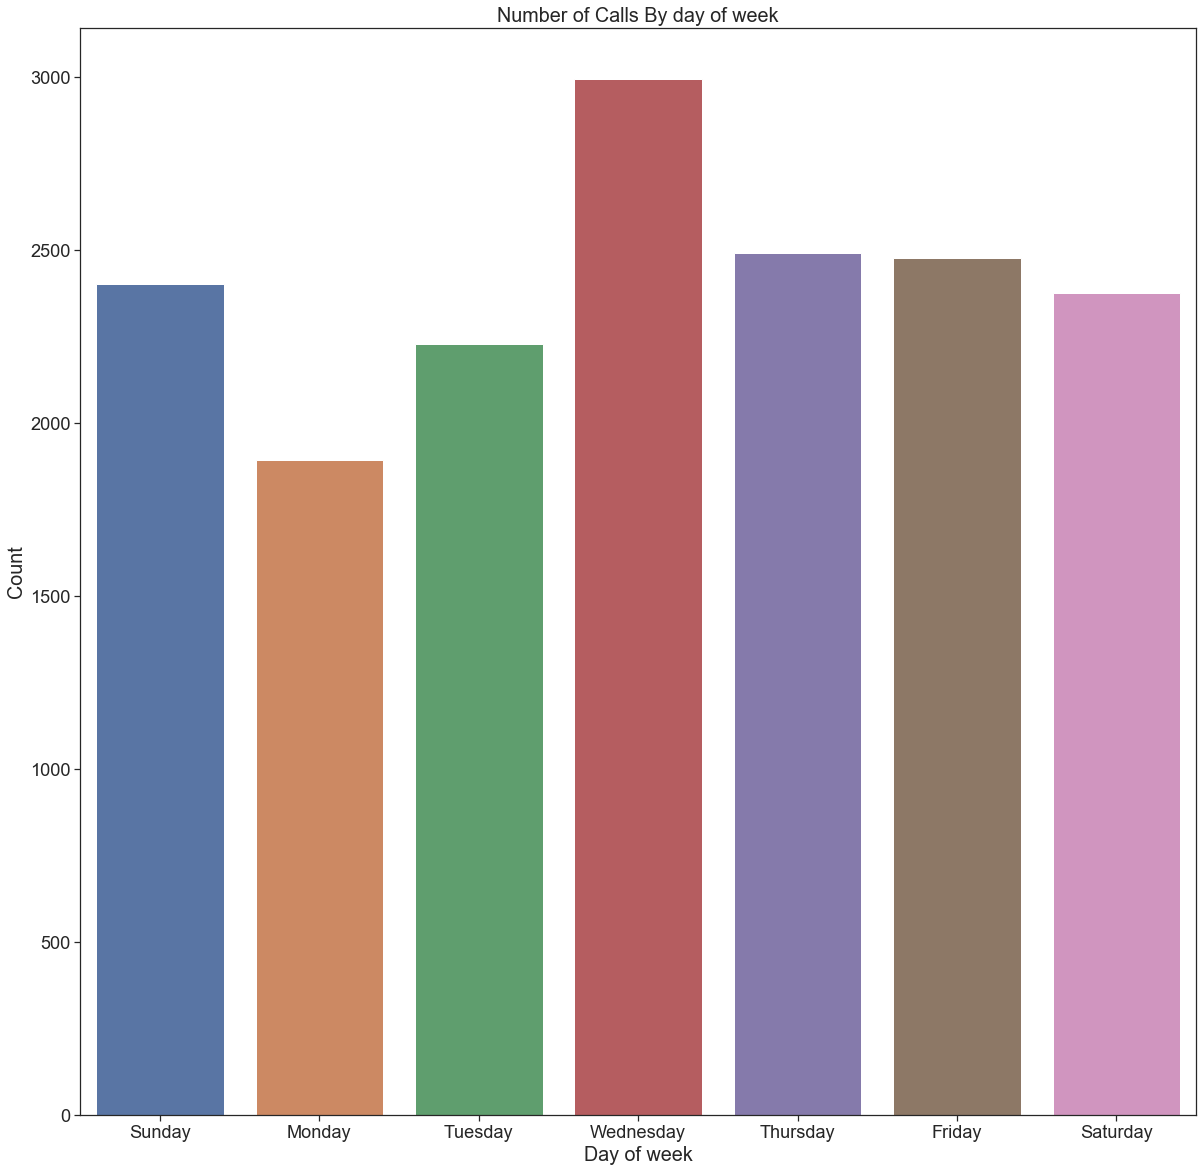

In [170]:

plt.figure(figsize=(20, 20))
o = "OFNS_DESC"
h = "BURGLARY"
d = 'DAY_OF_WEEK'

sets = calls[(calls[o] == h)]
df=sns.countplot(x=sets[d])

df.set_title('Number of Calls By day of week')
df.set_xticklabels(days, rotation=0)
plt.xlabel('Day of week', axes=ax)
plt.ylabel('Count', axes=ax)







## Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe.

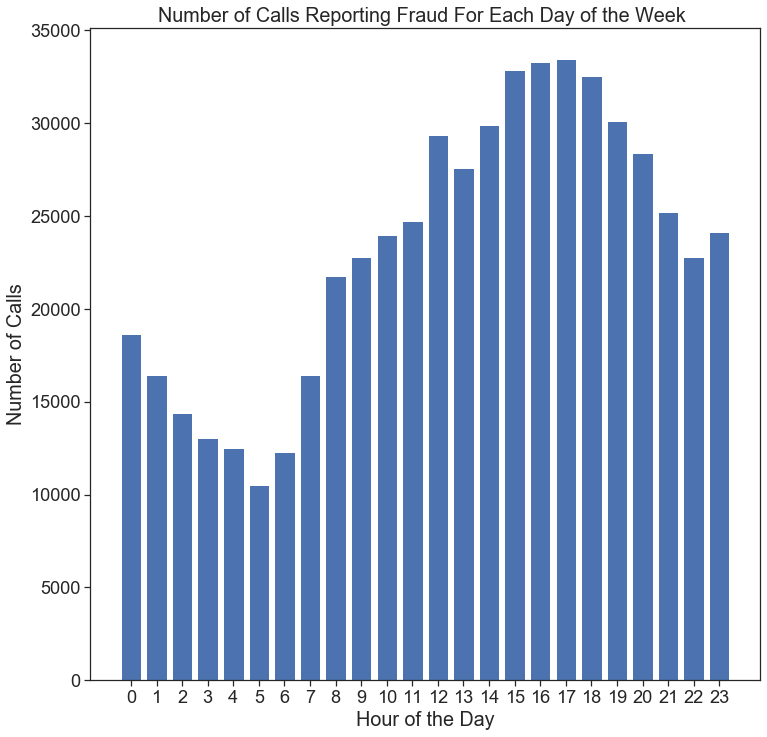

In [210]:

x= np.arange(24)

SC = calls['CMPLNT_TO_TM'].dropna().astype(str)

calls["Hour"] = SC.str.slice(0,2)

Done = SC.str.slice(0,2).value_counts().reindex(index=hours)


plt.figure(figsize=(12, 12))
plt.xticks(x, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
               '16','17','18','19','20','21','22','23'))

plt.bar(Done.index, Done.values, align = 'center')
plt.ylabel('Number of Calls')
plt.xlabel('Hour of the Day')
plt.title('Number of Calls Reporting Fraud For Each Day of the Week ')

plt.show()


## Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels


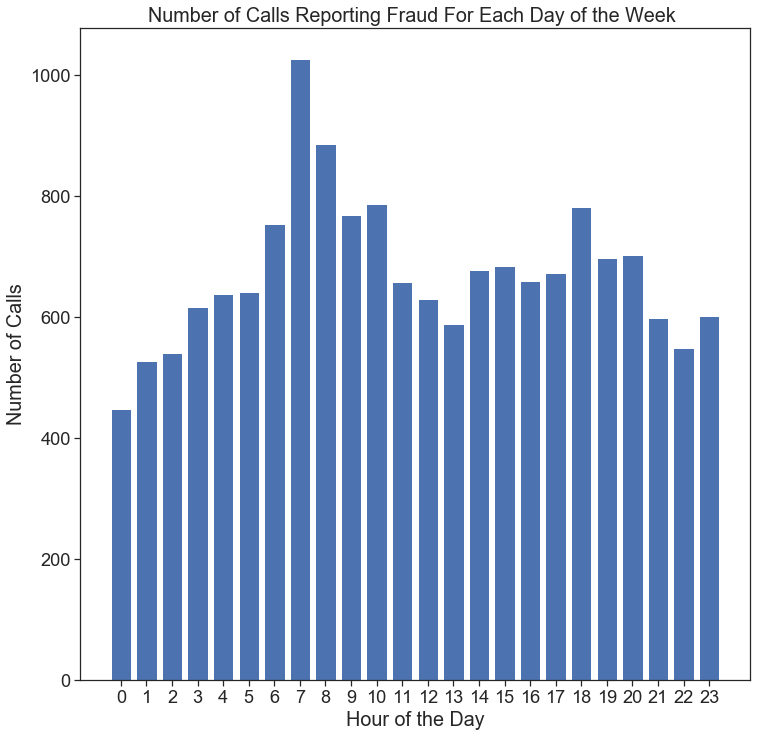

In [235]:



Burg = calls[(calls["OFNS_DESC"] == "BURGLARY")]
SC = Burg['CMPLNT_TO_TM'].dropna().astype(str)
SC = SC.str.slice(0,2).value_counts().reindex(hours)


plt.figure(figsize=(12, 12))

plt.bar(SC.index, SC.values, align = 'center')
plt.xticks(x, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
               '16','17','18','19','20','21','22','23'))
plt.ylabel('Number of Calls')
plt.xlabel('Hour of the Day')
plt.title('Number of Calls Reporting Fraud For Each Day of the Week ')

plt.show()



### Create a seaborn plot with the same data again.



[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

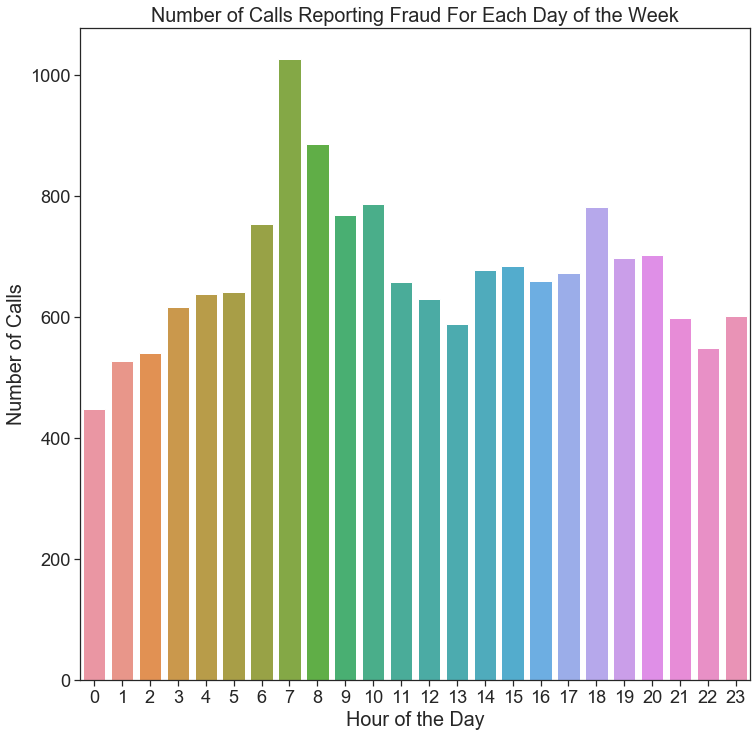

In [236]:

Burg = calls[(calls["OFNS_DESC"] == "BURGLARY")]

SC = Burg['CMPLNT_TO_TM'].dropna().astype(str)
SC = SC.str.slice(0,2).value_counts().reindex(hours)

plt.figure(figsize=(12, 12))

z= ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
               '16','17','18','19','20','21','22','23')

df = sns.barplot(SC.index, SC.values)
df.set_xlabel("Hour of the Day")
df.set_ylabel("Number of Calls")
df.set_title('Number of Calls Reporting Fraud For Each Day of the Week')
df.set_xticklabels(z, rotation=0)



### Is there a spike in burglary? During what time?


## At 7 and 8 am the largest spike occurs within my data. I do trust that this spike may be legitimate due to the possibility of families waking up in the morning after being robbed and immediately calling the police. Although there may be a far more likely data collecting isssue.



## Quartile Range Plot for different crimes and to show how the largest interquartile range is burglary.

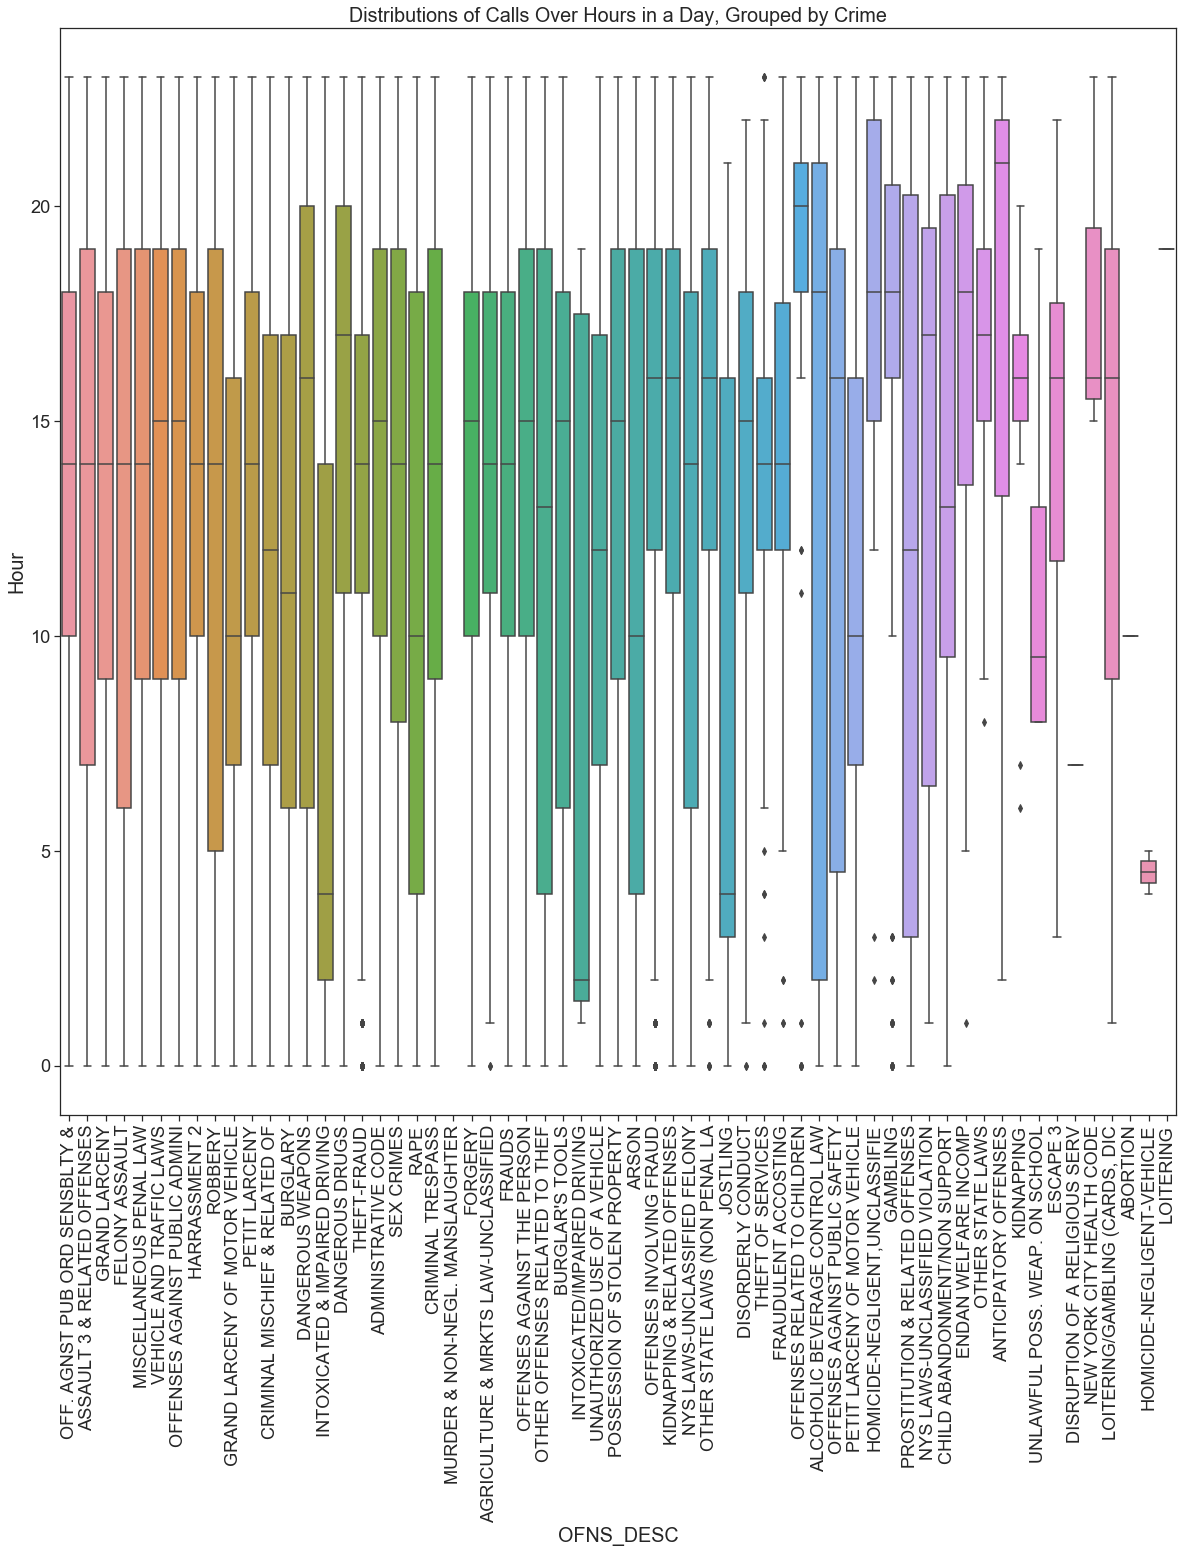

In [242]:

hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12",
         "13","14","15","16","17","18","19","20","21","22","23"]

SC = calls['CMPLNT_TO_TM'].dropna().astype(str)



plt.figure(figsize=(20, 20))

Done = calls["Hour"].dropna().astype("int32")

ax = sns.boxplot(data=calls, x=calls["OFNS_DESC"], y=Done)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "The largest interquartile range seems to be Burglary "
